# Test IEEE 14 - VSG

static Gen is for power flow calculation, including 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

Do not connect VSG to a GENROW <br>
VSG needs to share power from unit static gen

In [15]:
import andes
import os
import pandas as pd
# import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
# print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.2.post133+gb3f4674e


1. *setup()* is to configure the case, once setup, cannot add new device
   or setup=False and run *ss.setup()* after setting
2. $S_{base}=100MVA$ in the case file
3. 'Toggler' is a group to add connect and disconnect device at specific time.

In [16]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_buxin/ieee14_vsg1.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

In [17]:
# set load as constant load
# ssa.PQ.config.p2p = 1
# ssa.PQ.config.q2q = 1
# ssa.PQ.config.p2z = 0
# ssa.PQ.config.q2z = 0
# ssa.PQ.pq2z = 0

# Turn on numba to accelerate TDS
ssa.config.numba
ssa.setup()
ssa.PFlow.run()

True

In [18]:
ssa.REGCV2.Id0.v_str

'- u * Pref / v'

In [19]:
ssa.REGCV2.Id

Algeb: REGCV2.Id, []

In [20]:
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

True

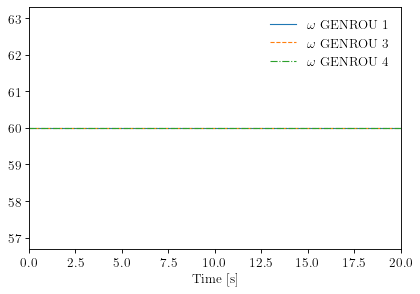

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [21]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3),
                ytimes=60,
               )

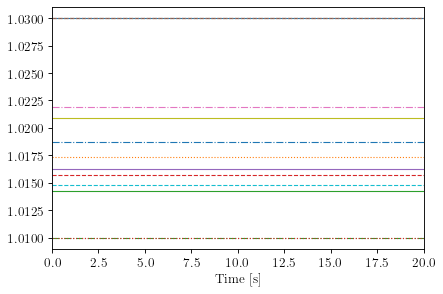

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [22]:
ssa.TDS.plt.plot(ssa.Bus.v)